In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

# Load your CSV data
data = pd.read_csv("/content/Ninapro DB1 23 Gestures.csv")

# Check if 'stimulus' column exists in your dataset
if 'stimulus' not in data.columns:
    print("The 'stimulus' column does not exist in your dataset. Please check your CSV file.")
else:
    # Define the gestures you want to train on (e.g., gestures 0, 1, 2, and 3)
    gestures_to_train = [2, 3, 4, 7, 9, 10, 17, 21]

    # Filter the data to only include the desired gestures
    data = data[data['stimulus'].isin(gestures_to_train)]

    # Reassign the labels
    le = LabelEncoder()
    data['stimulus'] = le.fit_transform(data['stimulus'])

    # Assuming 'stimulus' column contains the labels
    X = data.drop(columns=['stimulus']).values  # Features
    y = data['stimulus'].values                # Labels

    # Data preprocessing
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split the data into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Build a deep learning model with high complexity
    model = Sequential()
    model.add(Dense(units=2048, activation='relu', input_dim=11))  # Increase units
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Add multiple hidden layers with high units
    for _ in range(5):
        model.add(Dense(units=2048, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

    model.add(Dense(units=len(np.unique(y)), activation='softmax'))  # Output layer

    # Define learning rate scheduler
    def lr_schedule(epoch):
        if epoch < 20:
            return 0.001  # High learning rate initially
        else:
            return 0.0001  # Lower learning rate later

    # Implement learning rate reduction on plateau
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                  patience=5,
                                  min_lr=1e-7)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Define callbacks (early stopping, learning rate schedule, and reduce LR on plateau)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=15,
                               restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model for 300 epochs (increase epochs)
history = model.fit(X_train, y_train, epochs=300, batch_size=256, validation_data=(X_val,y_val), callbacks=[early_stopping, lr_scheduler, reduce_lr])



# Evaluate the model on the test set
test_loss,test_acc=model.evaluate(X_test,y_test)

print("Test accuracy:",test_acc)

# Save the trained model if needed
model.save('exercise_3_gestures_training.h5')  # Save as a new model

Epoch 1/300
226/226 [==============================] - 9s 17ms/step - loss: 1.5893 - accuracy: 0.4695 - val_loss: 1.9837 - val_accuracy: 0.2511 - lr: 0.0010
Epoch 2/300
226/226 [==============================] - 4s 16ms/step - loss: 1.1147 - accuracy: 0.5861 - val_loss: 1.3339 - val_accuracy: 0.4826 - lr: 0.0010
Epoch 3/300
226/226 [==============================] - 4s 16ms/step - loss: 1.0225 - accuracy: 0.6184 - val_loss: 0.8954 - val_accuracy: 0.6593 - lr: 0.0010
Epoch 4/300
226/226 [==============================] - 3s 15ms/step - loss: 0.9659 - accuracy: 0.6376 - val_loss: 0.8958 - val_accuracy: 0.6689 - lr: 0.0010
Epoch 5/300
226/226 [==============================] - 4s 16ms/step - loss: 0.9289 - accuracy: 0.6507 - val_loss: 0.8311 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 6/300
226/226 [==============================] - 4s 16ms/step - loss: 0.9042 - accuracy: 0.6586 - val_loss: 0.7710 - val_accuracy: 0.7117 - lr: 0.0010
Epoch 7/300
226/226 [==============================] - 3s 

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2048)              24576     
                                                                 
 batch_normalization_6 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_7 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 2048)             

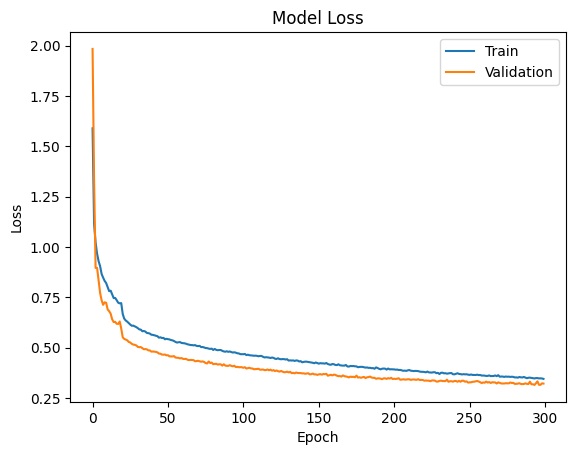

In [4]:
import matplotlib.pyplot as plt
#Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

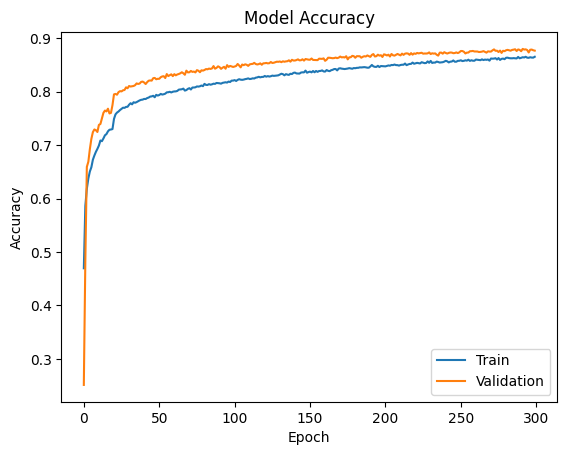

In [5]:
#Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()